# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. <br>
Our objective of this sutdy is to give the usefull insights out of the given data, understand the behaviour of customers over certain categories of app and use this data to help google playstore making boost in visibalizing the apps.


## Steps : - 
        1. Import all the required libraries.
        2. Extracting the data.
        3. Inspecting and clearning the data.
        4. Validating the type of data.
        5. Visualizing the data.
        6. Generating insights.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_V2.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [4]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [5]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [6]:
#Drop the rows having null values in the Rating field
inp1 = inp0[~inp0.Rating.isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [8]:

#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
#Inspect the nulls in the Android Version column
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
#Drop the row having shifted values
#inp1[(inp1["Android Ver"].isnull()) & (inp1.Category=="1.9")]
inp1.drop(index=10472,inplace=True)

In [11]:
#Check the nulls againin Android version column to cross-verify
inp1[(inp1["Android Ver"].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [12]:
#Check the most common value in the Android version column
val = inp1["Android Ver"].mode()[0]

In [13]:
#Fill up the nulls in the Android Version column with the above value
inp1["Android Ver"] = inp1["Android Ver"].fillna(val)

In [14]:
#Check the nulls in the Android version column again to cross-verify
inp1["Android Ver"].isnull().sum()

0

In [15]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [16]:
#Check the most common value in the Current version column
inp1["Current Ver"].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
7.32                     1
8.2.0_8                  1
2.0.15                   1
8.00.775375              1
23.0                     1
Name: Current Ver, Length: 2638, dtype: int64

In [17]:
#Replace the nulls in the Current version column with the above value
replace_val = inp1["Current Ver"].mode()[0]
inp1["Current Ver"] = inp1["Current Ver"].fillna(replace_val)

In [18]:
# Check the most common value in the Current version column again
inp1["Current Ver"].value_counts() #increaded by four.

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
7.32                     1
8.2.0_8                  1
2.0.15                   1
8.00.775375              1
23.0                     1
Name: Current Ver, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [19]:
#Check the datatypes of all the columns 
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
#Analyse the Price column to check the issue

inp1.Price.value_counts()

0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$3.02        1
$4.60        1
$14.00       1
$18.99       1
$3.08        1
Name: Price, Length: 73, dtype: int64

In [22]:
#Write the function to make the changes
inp1.Price = inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

In [23]:
#Verify the dtype of Price once again
inp1.Price.value_counts()

0.00     8719
2.99      114
0.99      107
4.99       70
1.99       59
         ... 
1.61        1
4.60        1
2.90        1
39.99       1
14.00       1
Name: Price, Length: 73, dtype: int64

In [24]:
#Analyse the Reviews column
inp1.Reviews.value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
8193       1
2020       1
515657     1
330761     1
2108       1
Name: Reviews, Length: 5992, dtype: int64

In [25]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int")

#Check the quantitative spread of this dataframe
inp1.describe()


,Rating,Reviews,Size,Price
count,9366.000000,9.366000e+03,9366.000000,9366.000000
mean,4.191757,5.140498e+05,22705.733753,0.960928
std,0.515219,3.144042e+06,21305.040123,15.816585
min,1.000000,1.000000e+00,8.500000,0.000000
25%,4.000000,1.862500e+02,6600.000000,0.000000
50%,4.300000,5.930500e+03,21000.000000,0.000000
75%,4.500000,8.153275e+04,27000.000000,0.000000
max,5.000000,7.815831e+07,100000.000000,400.000000


In [26]:
#Analyse the Installs Column
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [27]:
# Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1.Installs = inp1.Installs.apply(lambda x : int(x.replace(",","")[:-1]))

In [28]:
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [29]:
# perform sanity checks on ratings column
inp1.Rating.describe() # all safe.

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [30]:
#Perform the sanity checks on the Reviews column
inp1 = inp1[~(inp1.Reviews>inp1.Installs)]

In [31]:
#perform the sanity checks on prices of free apps 
inp1[(inp1.Type=="Free")& (inp1.Price>0)] # all safe.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


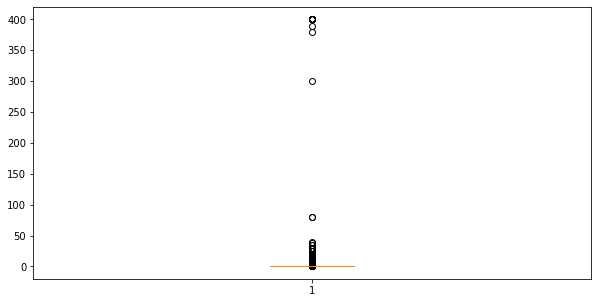

In [32]:
#Create a box plot for the price column
plt.figure(figsize=[10,5])
plt.boxplot(inp1.Price)
plt.show()

In [33]:
#Check the apps with price more than 200
inp1[inp1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


<font color="Green">Most of the apps with price 200 dollor and higher seams to be faek as they dont seem to have no function other than lauding the fact that they are rich, its better to delete all such rows.</font>

In [34]:
#Clean the Price column
inp1 = inp1[inp1.Price<200]

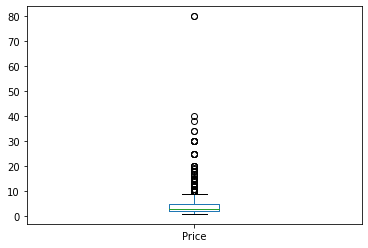

In [35]:
#Create a box plot for paid apps
inp1.Price[inp1.Price>0].plot.box()
plt.show()

In [36]:
#Check the apps with price more than 30
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


<font color="Green">With most of over apps prices below 30 some apps pricing about 30 wouldnt make any sense for this study, hence using the apps pricing below 30 dolors only.</font>

In [37]:
#App pricing more than 30 dollar is still very igh, lets limit our analysis to price below 30
inp1 = inp1[inp1.Price<30]

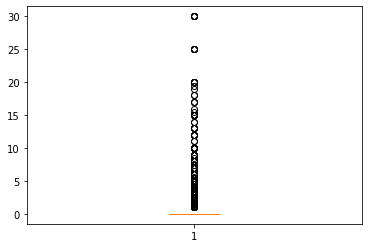

In [38]:
plt.boxplot(inp1.Price)
plt.show()

<font color="Green">As expected app with low price are more likley to be sold and hence have higher concentration.</font>

In [41]:
#Check records with 1 million reviews
inp1[inp1.Reviews>=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [42]:
#Drop the above records
inp1 = inp1[inp1.Reviews <=10000000]


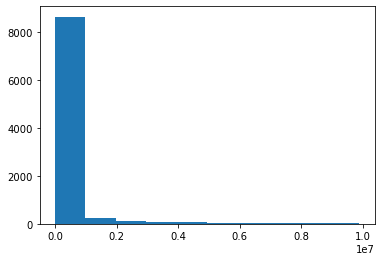

In [43]:
plt.hist(inp1.Reviews,bins=10)
plt.show()



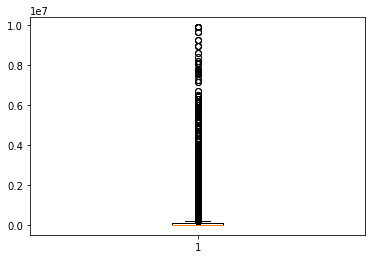

In [44]:
#Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Reviews)
plt.show()


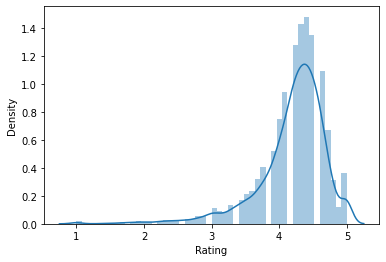

In [45]:
#Create a distribution plot for rating
sns.distplot(inp1.Rating)
plt.show()

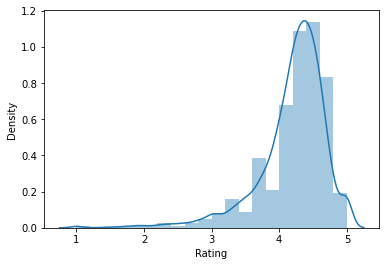

In [46]:
#Change the number of bins

sns.distplot(inp1.Rating,bins=20)
plt.show()

<font color="green">Majority of rating is being done in the range of 4 to 4.5 mark.</font>

In [47]:
#Change the colour of bins to green
Cat = list(inp1.Category.unique())

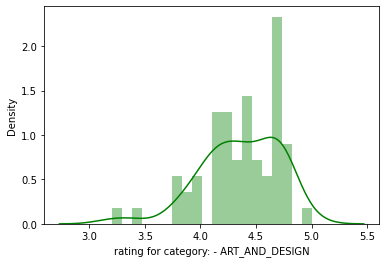

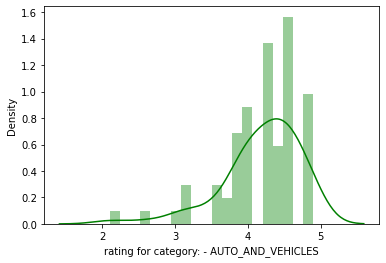

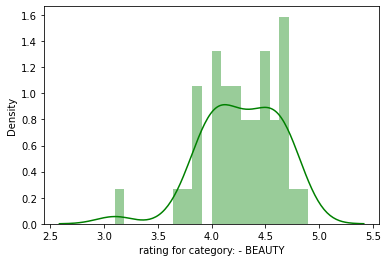

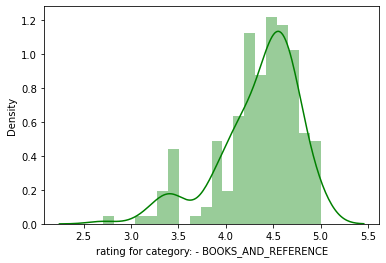

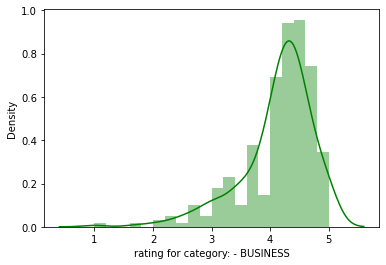

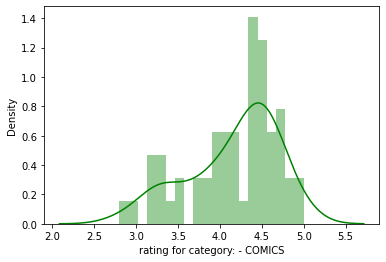

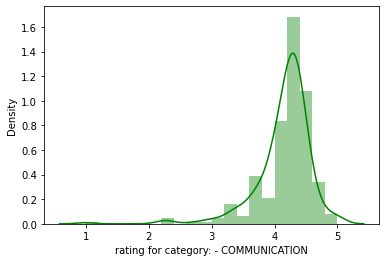

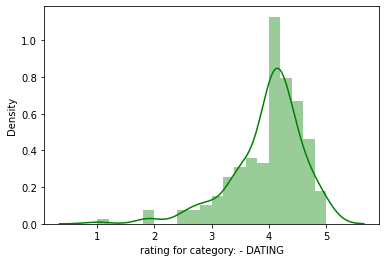

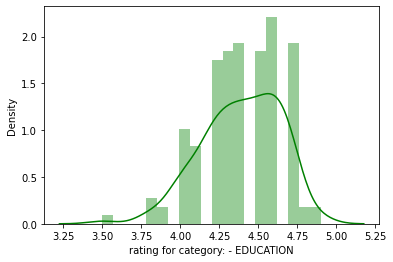

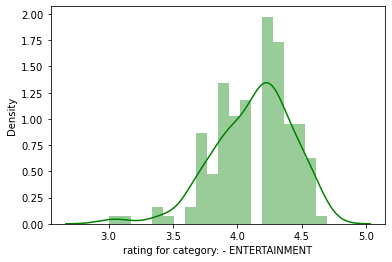

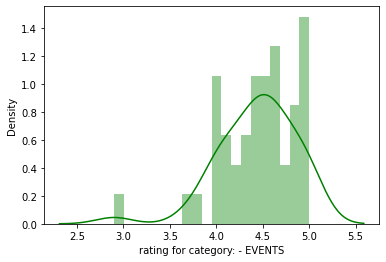

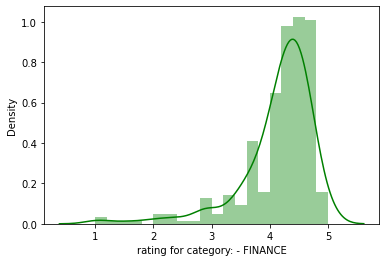

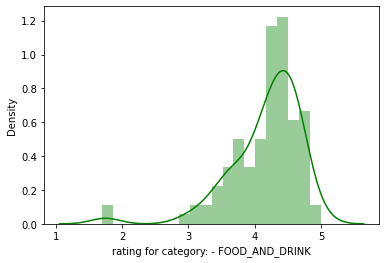

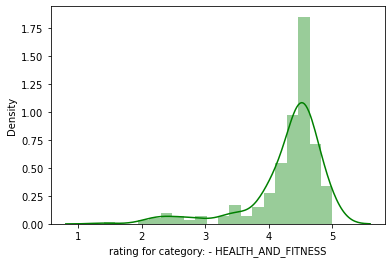

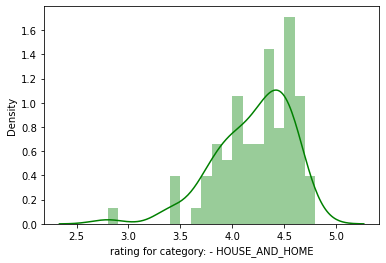

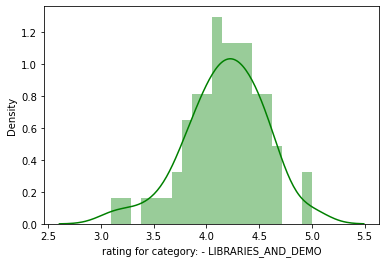

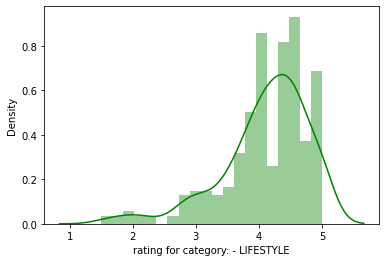

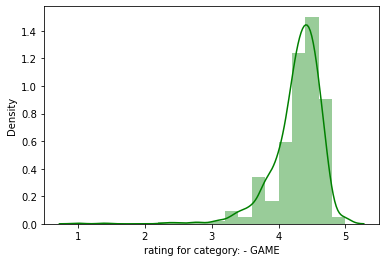

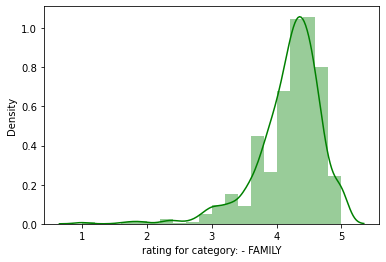

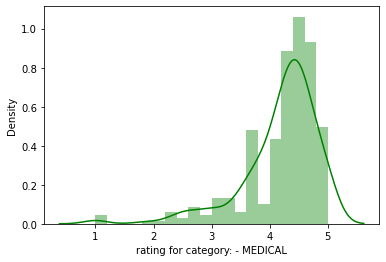

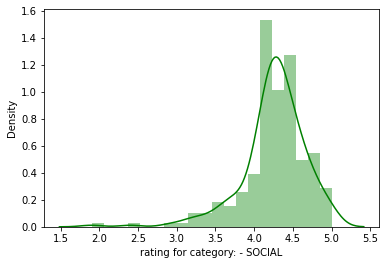

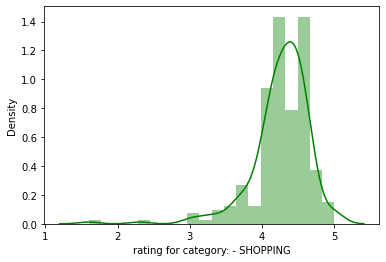

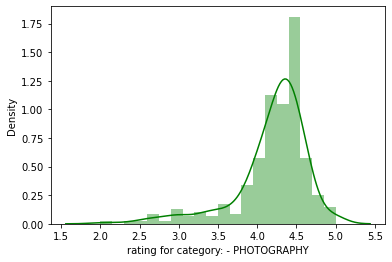

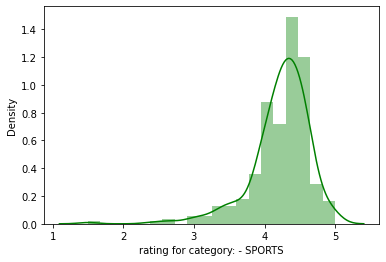

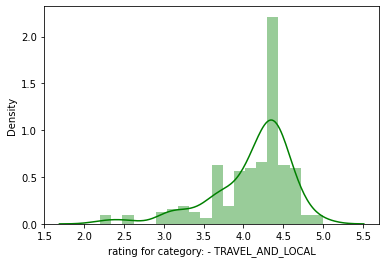

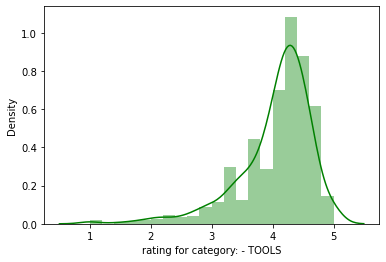

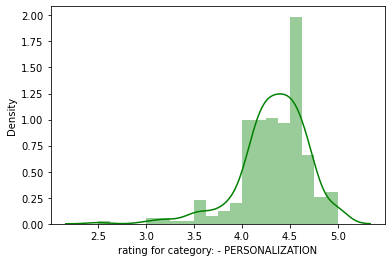

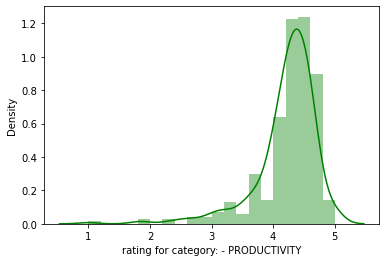

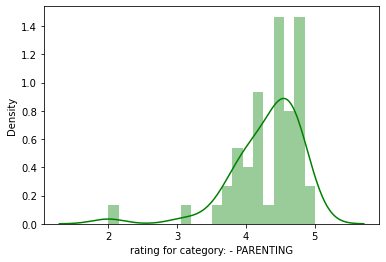

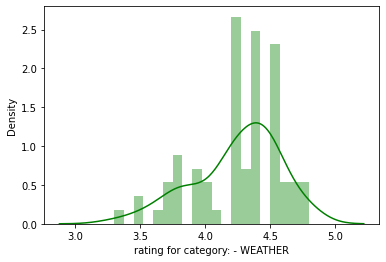

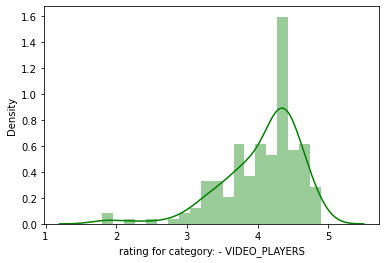

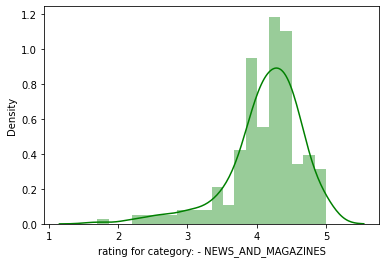

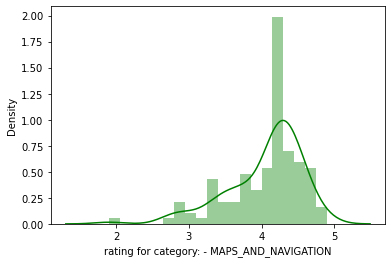

In [48]:
#Apply matplotlib functionalities
for i in Cat:
    sns.distplot(inp1.Rating[inp1.Category==i],bins=20,color="g")
    plt.xlabel("rating for category: - {}".format(i))
    plt.show()

**observing rating for each and every category of apps data given.**

In [50]:
#Analyse the Content Rating column
inp1["Content Rating"].value_counts()

Everyone           7340
Teen               1067
Mature 17+          458
Everyone 10+        377
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [51]:
#Remove the rows with values which are less represented 
inp1 = inp1[inp1["Content Rating"].isin(["Adults only 18+","Unrated"]) != True]

In [52]:
#Reset the index
inp1.reset_index(inplace=True,drop=True)

In [53]:
#Check the apps belonging to different categories of Content Rating 
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9242 entries, 0 to 9241
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9242 non-null   object 
 1   Category        9242 non-null   object 
 2   Rating          9242 non-null   float64
 3   Reviews         9242 non-null   int32  
 4   Size            9242 non-null   float64
 5   Installs        9242 non-null   int64  
 6   Type            9242 non-null   object 
 7   Price           9242 non-null   float64
 8   Content Rating  9242 non-null   object 
 9   Genres          9242 non-null   object 
 10  Last Updated    9242 non-null   object 
 11  Current Ver     9242 non-null   object 
 12  Android Ver     9242 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 902.7+ KB


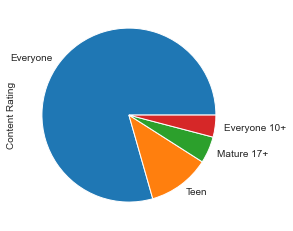

In [54]:
#Plot a pie chart
inp1["Content Rating"].value_counts().plot.pie()
plt.show()

<font color="green">Most of the content is rated by people in everone category and it is not any shocking revial.</font>

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

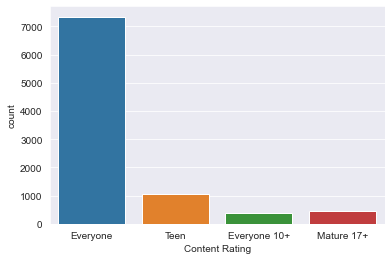

In [55]:
#Plot a Count chart
sns.countplot(inp1["Content Rating"])

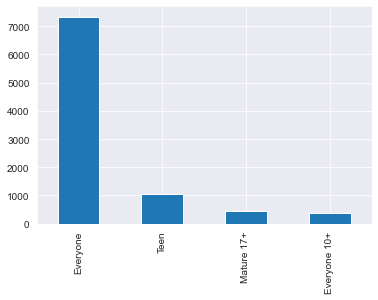

In [56]:
#bar plot
inp1["Content Rating"].value_counts().plot.bar()
plt.show()

<AxesSubplot:>

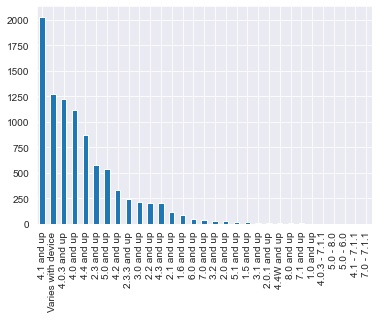

In [57]:
#Plot a bar plot for checking the 4th highest Android version type
inp1["Android Ver"].value_counts().plot.bar() # 4.o and up

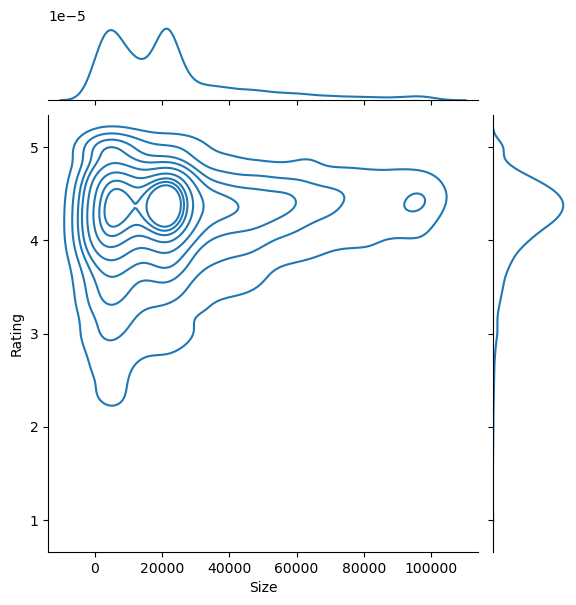

In [59]:
### Plot the same thing now using a jointplot
plt.style.use("default")
sns.jointplot(inp1.Size,inp1.Rating,kind="kde")

<font color="green">Lots of mass acquisition happens in between of size 0 and 20000</font>

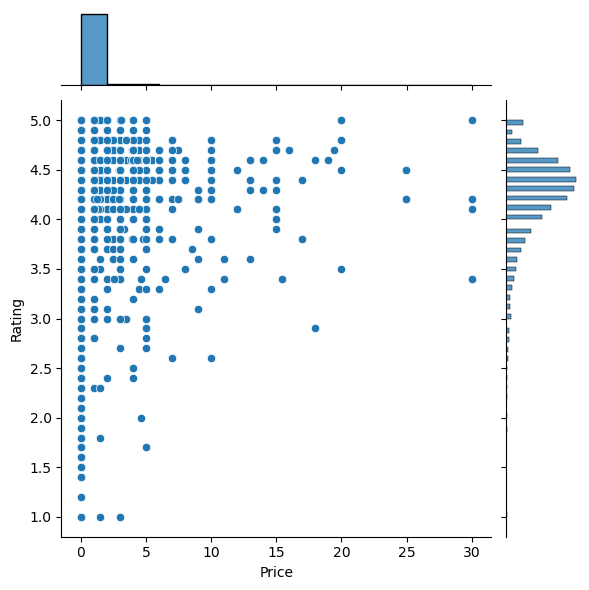

In [60]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp1.Price,inp1.Rating)

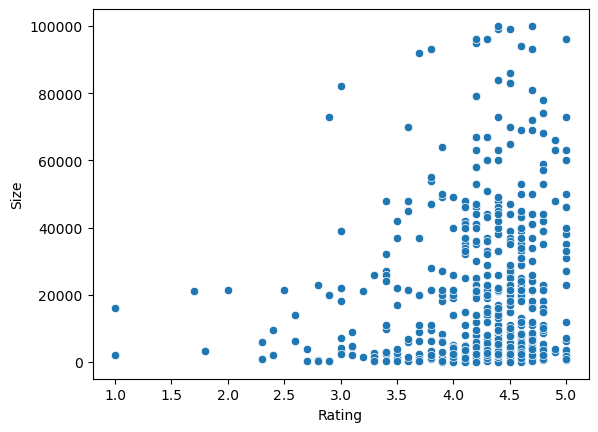

In [152]:
#Plot a reg plot for Price and Rating again for only the paid apps.
condition = inp1.Type=="Paid"
sns.scatterplot(inp1.Rating[condition],inp1.Size[condition])
plt.show()

<font color="green">Most of the paid app having higher size are having good reviews and reason is clear that this apps are cumbersome and only to use of a expert in that matter and hence gonnaa have good ratings.</font>

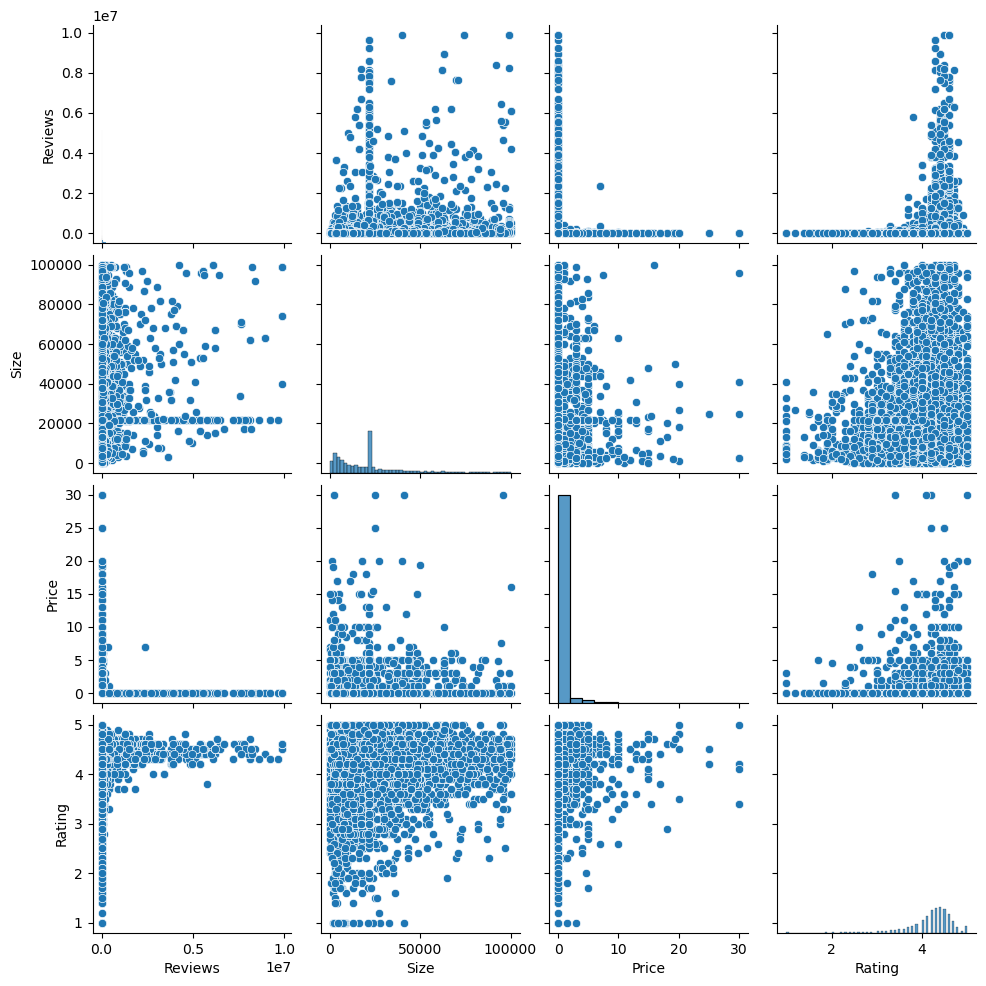

In [63]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[["Reviews","Size","Price","Rating"]])


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

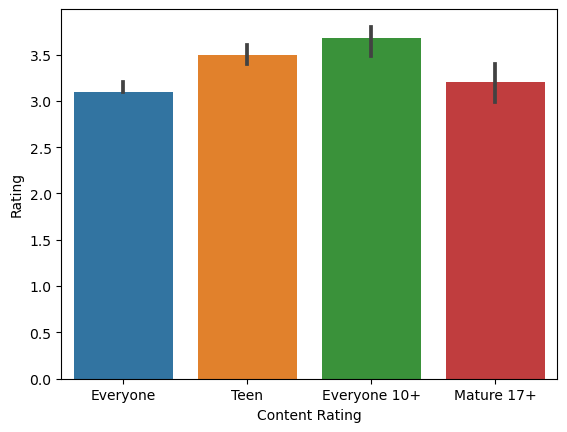

In [67]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1,x="Content Rating",y="Rating",estimator= lambda x: np.quantile(x,0.05))

<AxesSubplot:xlabel='Content Rating'>

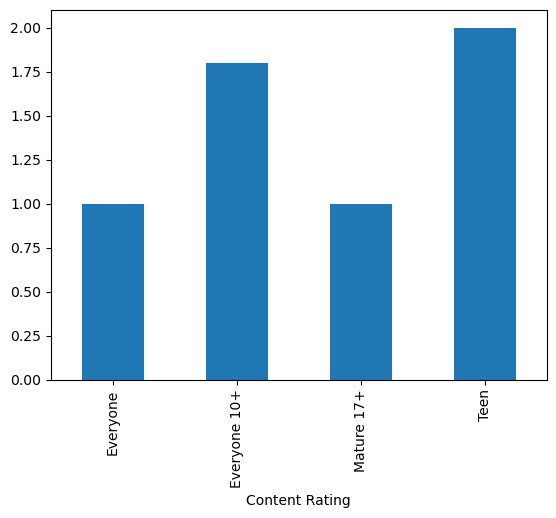

In [68]:
#Plot the bar plot with the minimum Rating
inp1.groupby(["Content Rating"])["Rating"].min().plot.bar()

<font color="green">Teens are supposed to have very extreme choice of decision making when it comes in rating either they like it or they hate it.</font>

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

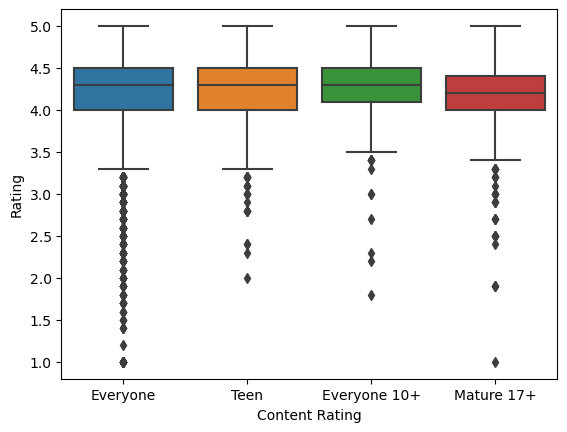

In [69]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(inp1["Content Rating"],inp1["Rating"])

In [153]:
# Most numbers of rating been done for the following categories.
inp1.groupby(["Genres"])["Rating"].count().sort_values(ascending=False)[:4]

Genres
Tools            726
Entertainment    529
Education        468
Action           356
Name: Rating, dtype: int64

In [103]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut
inp1["Size_Basket"]=pd.qcut(inp1.Size,[i for i in np.linspace(0,1,6)],["VL","L","M","H","VH"])



In [112]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
result = pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Basket",values="Rating",aggfunc=lambda x : np.quantile(x,0.2))
result

Size_Basket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,4.0
Everyone 10+,3.86,3.98,4.1,4.0,4.0
Mature 17+,3.42,3.70,3.9,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


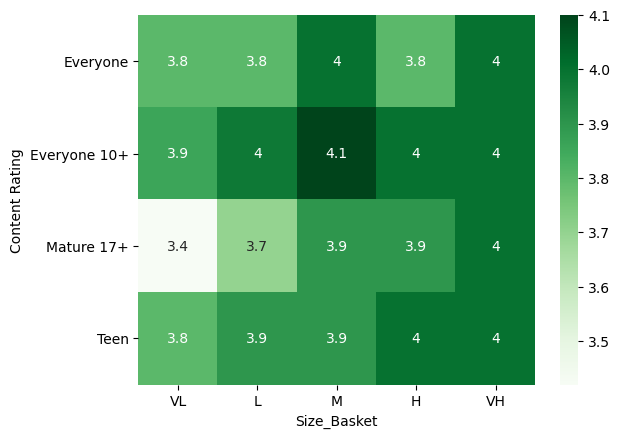

In [115]:
##heat map
sns.heatmap(result,cmap="Greens",annot=True)
plt.show()

<font color="green">For Everone+ apps irrespective of the size rating seems to be constant due to the high number of vote casted. </font>

In [119]:
## Extract the month from the Last Updated Date
inp1["Updated Month"]=pd.to_datetime(inp1["Last Updated"]).dt.month


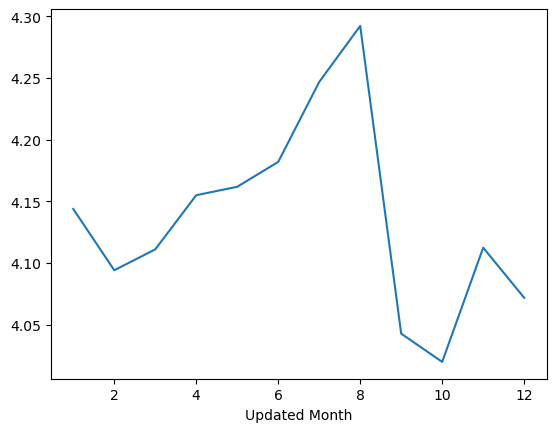

In [127]:
## Find the average Rating across all the months
avg_Rating = inp1.groupby(["Updated Month"])["Rating"].mean().plot()

<font color="green"> Higher ratings are casted in month 6-8 and marked at very high level also </font>

In [130]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
monthly_install = pd.pivot_table(data=inp1,values="Installs",index="Updated Month",columns="Content Rating",aggfunc=sum)

<AxesSubplot:xlabel='Updated Month'>

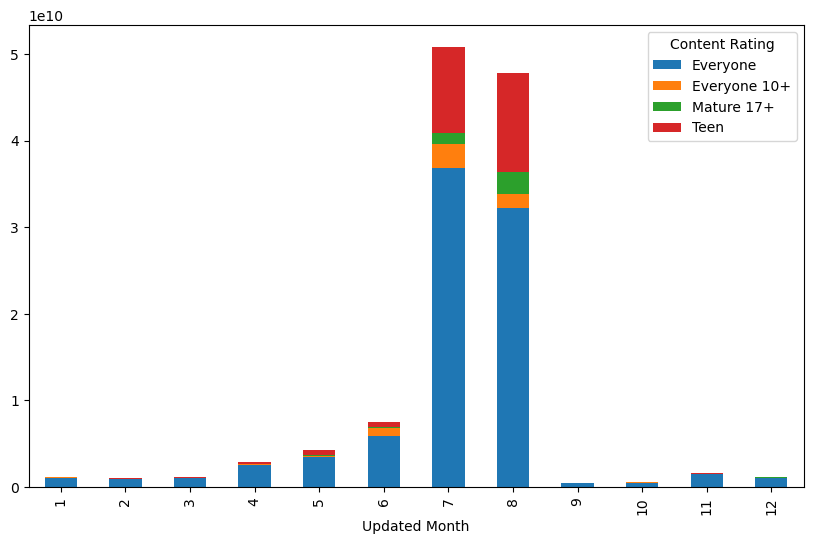

In [135]:
##Store the table in a separate variable

monthly_install.plot(kind="bar",stacked=True,figsize=[10,6])

In [148]:
##Plot the stacked bar chart again wrt to the proportions.

monthly_prec = monthly_install[monthly_install.columns.to_list()].apply(lambda x: x/x.sum(),axis=1)

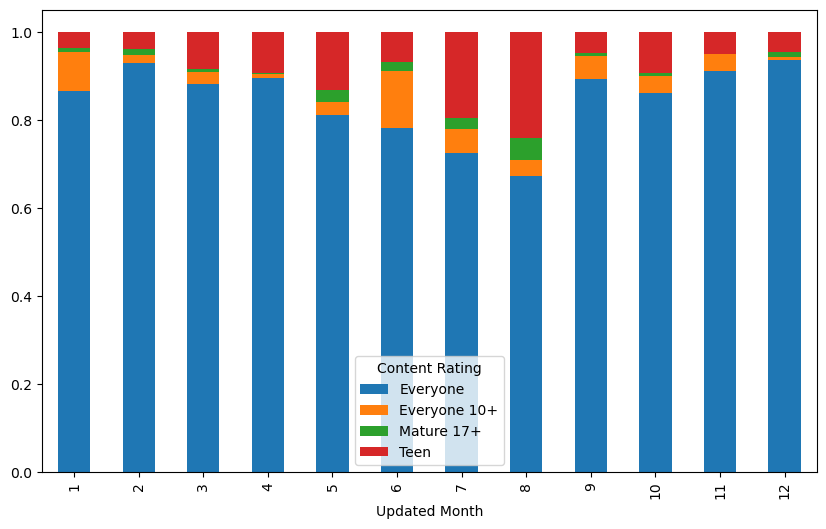

In [151]:
monthly_prec.plot(kind="bar",stacked=True,figsize=[10,6])
plt.show()